---
# Name of Method - Model 2
---
In this notebook, ...


## Results

---

### Importing necessary library

In [45]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

### Read data file

In [14]:
churn_df = pd.read_excel('../data/churn_cleaned_featEng.xlsx')
churn_df

,Tenure Months,Monthly Charges,Churn Value,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_Yes,Online Backup_Yes,Device Protection_Yes,Tech Support_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
1,2,70.70,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0
2,8,99.65,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
3,28,104.80,1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,0
4,49,103.70,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
7039,24,84.80,0,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1
7040,72,103.20,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0
7041,11,29.60,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0


---

<center>
    
## Preparing data

</center>

---

### Separate X and y features

In [15]:
# Seperate X and y features
X = churn_df.drop(columns=['Churn Value'])
y = churn_df['Churn Value']

### Split dataset (training/testing)

In [16]:
# Separating the dataset into a training dataset (70%) and testing+validation (30%) dataset
X_train, X_test_validation, y_train, y_test_validation = train_test_split(X, y, train_size=0.7, random_state=5)

# Separating the testing+valisation dataset into a testing dataset (15%) and a validation dataset (15%) 
X_val, X_test, y_val, y_test = train_test_split(X_test_validation, y_test_validation, test_size=0.5, random_state=5)

### Converting data subset to dataframe 

In [17]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### Scale X features

In [20]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

<center>
    
## K Nearest Neighbour Model

</center>

---

### Find best parameters for model


In [21]:
# Initialize classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
## Evaluate Model

In [23]:
y_pred = knn.predict(X_test_scaled)

print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 1 

In [24]:
knn.predict_proba(X_test_scaled)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

## Accuracy

In [25]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.7617


In [26]:
# Compare train and test scores

print('Training set score: {:.4f}'.format(knn.score(X_train_scaled, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test_scaled, y_test)))

Training set score: 0.8653
Test set score: 0.7617


In [27]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[433  87]
 [ 81 104]]

True Positives(TP) =  433

True Negatives(TN) =  104

False Positives(FP) =  87

False Negatives(FN) =  81


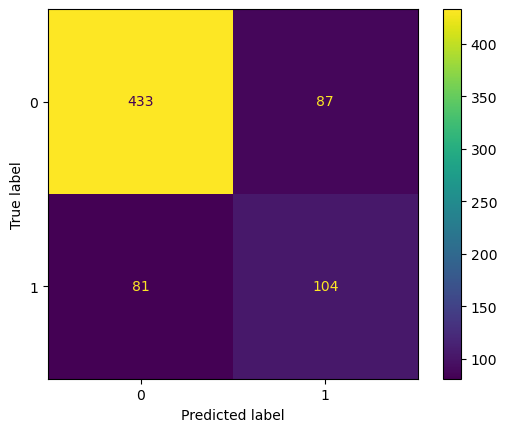

In [46]:
# Display the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [28]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       520
           1       0.54      0.56      0.55       185

    accuracy                           0.76       705
   macro avg       0.69      0.70      0.70       705
weighted avg       0.76      0.76      0.76       705



##  k-fold Cross-Validation

Let's apply K-Fold Cross-Validation to our model.

In [29]:
# Applying 10-Fold cross-validation

scores = cross_val_score(knn, X_train_scaled, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.77287066 0.75867508 0.77917981 0.76971609 0.7681388  0.75394322
 0.71451104 0.75867508 0.72195893 0.75829384]


We can summarize the cross-validation accuracy by calculating its mean.

In [30]:
# Compute average cross-validation score

print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))
print('\nLowest cross-validation score: {:.4f}'.format(scores.min()))
print('\nHighest cross-validation score: {:.4f}'.format(scores.max()))


Average cross-validation score: 0.7556

Lowest cross-validation score: 0.7145

Highest cross-validation score: 0.7792


The model's average performance across different subsets of the data is 75.33%. This means that, on average, the model correctly classifies 75.33% of the data in each fold.
The highest score is 77.30%. This represents the best performance on any single fold. During this fold, the model performed with 77.30% accuracy.

Text(0.5, 0, 'K Value')

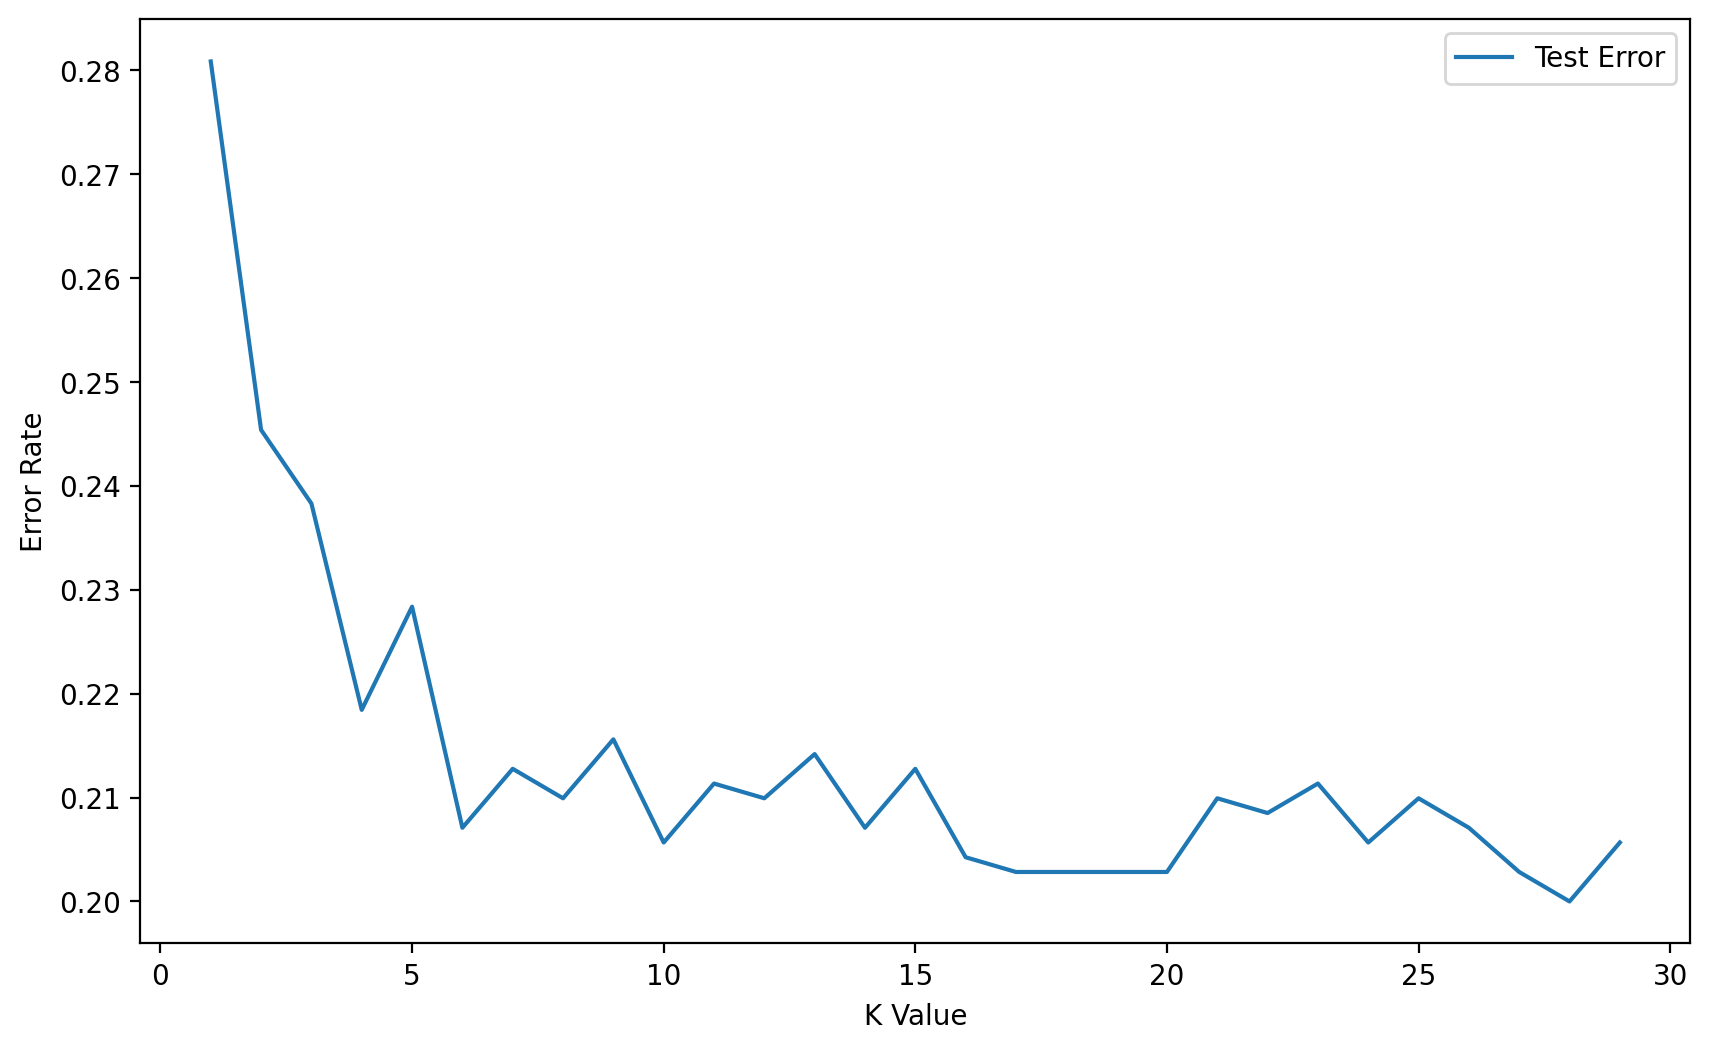

In [31]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

### Run model on training dataset

In [32]:
# Set-up pipeline object

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', KNeighborsClassifier())
])

In [33]:
# Set-up parameter grid using
# Use GridSearchCV to find optimal params
from sklearn.model_selection import GridSearchCV

param_grid = {'classifier__n_neighbors': list(range(1,20)),
              'classifier__weights': ['uniform', 'distance'],
              'classifier__p': np.linspace(1,2,5)}

full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19],
                         'classifier__p': array([1.  , 1.25, 1.5 , 1.75, 2.  ]),
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [34]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', KNeighborsClassifier(n_neighbors=15, p=2.0))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': KNeighborsClassifier(n_neighbors=15, p=2.0),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 15,
 'classifier__p': 2.0,
 'classifier__weights': 'uniform'}

### Evaluate GridSearchCV Model

In [36]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_classifier__n_neighbors', 'param_classifier__p', 'param_classifier__weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

[0.72830477 0.72830477 0.72767386 0.72767386 0.72830502 0.72830502
 0.72909329 0.72909329 0.72909391 0.72909391 0.75780701 0.72909329
 0.75891061 0.72846238 0.75922657 0.72909354 0.75796461 0.72988181
 0.7574913  0.72956697 0.75701862 0.74692136 0.75685989 0.74865675
 0.75812172 0.74865638 0.75906859 0.74786724 0.75938392 0.7473938
 0.77248088 0.75275919 0.77106045 0.75212728 0.77090198 0.75086483
 0.76948192 0.75133864 0.77042879 0.7496025  0.77326953 0.75938604
 0.77358411 0.75922819 0.77689654 0.7606475  0.77658171 0.76080585
 0.77721187 0.76001658 0.78099948 0.76380282 0.78163064 0.765223
 0.77942157 0.7628557  0.77800189 0.7628557  0.77800126 0.7628552
 0.78289372 0.76995698 0.7822633  0.7712193  0.78084374 0.77058764
 0.77942344 0.76900961 0.77910748 0.76790426 0.78636499 0.76885163
 0.78526015 0.76932444 0.78368211 0.7674302  0.78478733 0.76727235
 0.78462948 0.76821872 0.78715314 0.77390044 0.78699516 0.77374172
 0.78731149 0.77326866 0.78399819 0.77200695 0.78447088 0.77105983

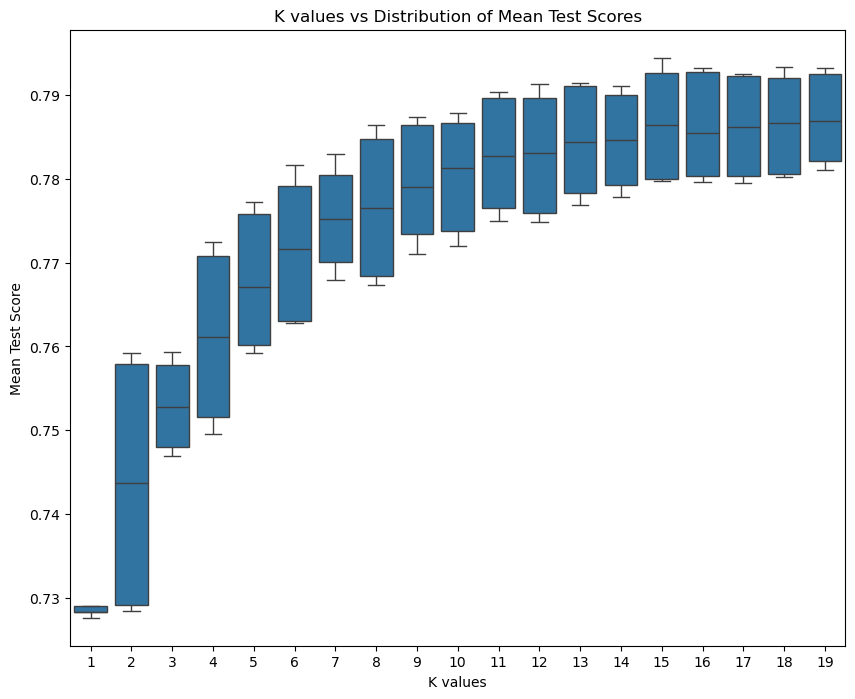

In [48]:
# Mean test scores

# Retrieve k values
k_values = full_cv_classifier.cv_results_['param_classifier__n_neighbors'].data

# Retrieve mean test scores
mean_test_score = full_cv_classifier.cv_results_['mean_test_score']

print(mean_test_score)

# Create figure and adjust its size
plt.figure(figsize=(10,8))

# Create box plot
ax = sns.boxplot(x=k_values, y = mean_test_score)

# Add tittle
ax.set_title('K values vs Distribution of Mean Test Scores')

# Set axis labels
ax.set_xlabel(xlabel='K values')
ax.set_ylabel(ylabel='Mean Test Score')

# Show plot
plt.show()

In [38]:
full_cv_classifier.cv_results_['mean_test_score'].mean()

0.7739337603642759

In [39]:
pipe.set_params(classifier__n_neighbors=15)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=15))])

In [40]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=15))])

In [41]:
pipe_pred = pipe.predict(X_test)

In [42]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       520
           1       0.61      0.53      0.57       185

    accuracy                           0.79       705
   macro avg       0.72      0.70      0.71       705
weighted avg       0.78      0.79      0.78       705



In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       520
           1       0.54      0.56      0.55       185

    accuracy                           0.76       705
   macro avg       0.69      0.70      0.70       705
weighted avg       0.76      0.76      0.76       705



## Classification report on pipeline data:


| Class         | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| 0             | 0.84      | 0.88   | 0.86     | 520     |
| 1             | 0.61      | 0.53   | 0.57     | 185     |
| **Accuracy**  |           |        | **0.79** | 705     |
| **Macro avg** | 0.72      | 0.70   | 0.71     | 705     |
| **Weighted avg** | 0.78   | 0.79   | 0.78     | 705     |

---

### Explanation of Metrics:
- **Precision**: The proportion of true positive predictions out of all positive predictions.
- **Recall**: The proportion of true positive predictions out of all actual positive instances.
- **F1-score**: The harmonic mean of precision and recall, balancing both metrics.
- **Support**: The number of actual occurrenc




### Classification report on test data:

| Class         | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| 0             | 0.84      | 0.83   | 0.84     | 520     |
| 1             | 0.54      | 0.56   | 0.55     | 185     |
| **Accuracy**  |           |        | **0.76** | 705     |
| **Macro avg** | 0.69      | 0.70   | 0.70     | 705     |
| **Weighted avg** | 0.76   | 0.76   | 0.76     | 705     |

---

### Explanation of Metrics:
- **Precision**: The proportion of true positive predictions out of all positive predictions.
- **Recall**: The proportion of true positive predictions out of all actual positive instances.
- **F1-score**: The harmonic mean of precision and recall, balancing both metrics.
- **Support**: The number of actual occurrences of the class in the dataset.


### Investigate best model's predictive features

---

<center>
    
## Validation

</center>

---

### Run model on testing dataset

### Model's validation

---

<center>
    
## Results

</center>

---

### Results